# **Waze Project**

# **Exploratory data analysis**

In this phase, we will explore the provided dataset to better understand its structure and key characteristics, preparing it for further analysis.

<br/>

**The purpose** of this step is to perform exploratory data analysis (EDA), using visualizations and descriptive statistics to gain insights and identify key trends.

**The goal** is to effectively communicate the story behind the data by highlighting significant patterns, relationships, and anomalies that will guide future analysis.

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data\waze_app_dataset.csv')

In [4]:
df.head(4)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [6]:
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [7]:
df.isna().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

In [8]:
# Isolate rows with null values
null_df = df[df['label'].isnull()]
# Display summary stats of rows with null values
null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,7405.584286,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,4306.900234,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,77.000000,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,3744.500000,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,7443.000000,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,11007.000000,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,14993.000000,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


In [9]:
df.dropna(inplace=True)

In [10]:
df.duplicated().any()

False

In [11]:
# Isolate rows without null values
not_null_df = df[~df['label'].isnull()]
# Display summary stats of rows without null values
not_null_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,7503.573117,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,4331.207621,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,7504.000000,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,11257.500000,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


## Feature Engineering 

In [12]:
# Add a column to df called `km_per_drive`
df['km_per_drive'] = df['driven_km_drives'] / df['drives']
# Convert infinite values to zero
df.loc[df['km_per_drive']==np.inf, 'km_per_drive'] = 0

# Group by `label`, calculate the median, and isolate for km per drive
median_km_per_drive = df.groupby('label').median(numeric_only=True)[['km_per_drive']]
median_km_per_drive

,km_per_drive
label,
churned,72.771939
retained,73.006576


In [13]:
# Add a column to df called `km_per_driving_day`
df['km_per_driving_day'] = df['driven_km_drives'] / df['driving_days']
# Convert infinite values to zero
df.loc[df['km_per_driving_day']==np.inf, 'km_per_driving_day'] = 0

# Group by `label`, calculate the median, and isolate for km per driving day
median_km_per_driving_day = df.groupby('label').median(numeric_only=True)[['km_per_driving_day']]
median_km_per_driving_day

,km_per_driving_day
label,
churned,407.597934
retained,256.056187


In [14]:
# Add a column to df called `drives_per_driving_day`
df['drives_per_driving_day'] = df['drives'] / df['driving_days']
# Convert infinite values to zero
df.loc[df['drives_per_driving_day']==np.inf, 'drives_per_driving_day'] = 0
# Replace na values with zero
df['drives_per_driving_day'].fillna(0, inplace=True)

# Group by `label`, calculate the median, and isolate for drives per driving day
median_drives_per_driving_day = df.groupby('label').median(numeric_only=True)[['drives_per_driving_day']]
median_drives_per_driving_day

,drives_per_driving_day
label,
churned,5.483333
retained,3.470588


We're creating percent_sessions_in_last_month feature that represents the percentage of each user's total sessions that were logged in their last month of use.

In [15]:
df['percent_sessions_in_last_month'] = df.sessions / df.total_sessions
# Convert infinite values to zero
df.loc[df['percent_sessions_in_last_month']==np.inf, 'percent_sessions_in_last_month'] = 0

df['percent_sessions_in_last_month'].describe()

count    14299.000000
mean         0.449837
std          0.286863
min          0.000000
25%          0.196890
50%          0.424310
75%          0.687251
max          1.530637
Name: percent_sessions_in_last_month, dtype: float64

We're creating professional_driver feature that is a 1 for users who had 60 or more drives AND drove on 15+ days in the last month.

Note: The objective is to create a new feature that separates professional drivers from other drivers. In this scenario, domain knowledge and intuition are used to determine these deciding thresholds, but ultimately they are arbitrary.

In [16]:
df['professional_driver'] = np.where((df['drives'] >= 60) & (df['driving_days'] >= 15), 1, 0)
# Convert infinite values to zero
df.loc[df['professional_driver']==np.inf, 'professional_driver'] = 0

df['professional_driver'].describe()

count    14299.000000
mean         0.173998
std          0.379121
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: professional_driver, dtype: float64

Here we are creating a new column that represents the mean number of sessions per day since onboarding

In [17]:
df['total_sessions_per_day'] = df.total_sessions / df.n_days_after_onboarding
# Convert infinite values to zero
df.loc[df['total_sessions_per_day']==np.inf, 'total_sessions_per_day'] = 0

df['total_sessions_per_day'].describe()

count    14299.000000
mean         0.338207
std          1.319814
min          0.000298
25%          0.050818
50%          0.100457
75%          0.215210
max         39.763874
Name: total_sessions_per_day, dtype: float64

We are creating a column representing the mean kilometers per hour driven in the last month.

In [18]:
df['km_per_hour'] = df.driven_km_drives / (df.duration_minutes_drives / 60)
# Convert infinite values to zero
df.loc[df['km_per_hour']==np.inf, 'km_per_hour'] = 0

df['km_per_hour'].describe()

count    14299.000000
mean       190.730963
std        339.926138
min         72.013095
25%         90.649402
50%        122.105845
75%        193.238449
max      23642.920871
Name: km_per_hour, dtype: float64

We're creating a column representing the mean number of kilometers per drive made in the last month for each user.

In [19]:
df['km_per_drive'] = df.driven_km_drives / df.drives
# Convert infinite values to zero
df.loc[df['km_per_drive']==np.inf, 'km_per_drive'] = 0

df['km_per_drive'].describe()

count    14299.000000
mean       232.269197
std        616.197409
min          0.000000
25%         32.486524
50%         72.947059
75%        179.347527
max      15777.426560
Name: km_per_drive, dtype: float64

Now we are creating a new column that represents the percentage of total sessions that were used to navigate to one of the users' favorite places.

This is a proxy representation for the percent of overall drives that are to a favorite place. Total drives since onboarding are not contained in this dataset, therefore total sessions must serve as a reasonable approximation.

People whose drives to non-favorite places make up a higher percentage of their total drives might be less likely to churn, since they're making more drives to less familiar places.

In [20]:
df['percent_of_sessions_to_favorite'] = (df['total_navigations_fav1'] + df['total_navigations_fav2']) / df.total_sessions
 # Convert infinite values to zero
df.loc[df['percent_of_sessions_to_favorite']==np.inf, 'percent_of_sessions_to_favorite'] = 0

df['percent_of_sessions_to_favorite'].describe()

count    14299.000000
mean         1.676347
std          9.021250
min          0.000000
25%          0.206064
50%          0.653572
75%          1.643183
max        777.563629
Name: percent_of_sessions_to_favorite, dtype: float64

Since there are 700 observations with missing values which comprise less than 5% of the data, we're using the dropna() method to drop the rows that are missing this data.

In [21]:
df['device2'] = df.device.map({'Android': 0, 'iPhone': 1})

In [22]:
df['device2'] = df['device2'].astype('int32')

In [23]:
df['label2'] = df.label.map({'retained': 0, 'churned': 1})
df['label2'] = df['label2'].astype('int32')

The only feature that can be cut is ID, since it doesn't contain any information relevant to churn.

In [24]:
df.drop(columns='ID', inplace=True, axis=1)
df.dropna(inplace=True)

## Descriptive Statistics 

In [25]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_drive,km_per_driving_day,drives_per_driving_day,percent_sessions_in_last_month,professional_driver,total_sessions_per_day,km_per_hour,percent_of_sessions_to_favorite,device2,label2
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530,232.269197,581.942399,9.360417,0.449837,0.173998,0.338207,190.730963,1.676347,0.645150,0.177355
std,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835,616.197409,1038.254509,19.734906,0.286863,0.379121,1.319814,339.926138,9.021250,0.478485,0.381982
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000298,72.013095,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,32.486524,136.168003,1.230769,0.196890,0.000000,0.050818,90.649402,0.206064,0.000000,0.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,72.947059,273.301012,3.666667,0.424310,0.000000,0.100457,122.105845,0.653572,1.000000,0.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,179.347527,558.018761,9.000000,0.687251,0.000000,0.215210,193.238449,1.643183,1.000000,0.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000,15777.426560,15420.234110,395.000000,1.530637,1.000000,39.763874,23642.920871,777.563629,1.000000,1.000000


## Univariate Analysis

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

In [28]:
numerical_features

Index(['sessions', 'drives', 'total_sessions', 'n_days_after_onboarding',
       'total_navigations_fav1', 'total_navigations_fav2', 'driven_km_drives',
       'duration_minutes_drives', 'activity_days', 'driving_days',
       'km_per_drive', 'km_per_driving_day', 'drives_per_driving_day',
       'percent_sessions_in_last_month', 'total_sessions_per_day',
       'km_per_hour', 'percent_of_sessions_to_favorite'],
      dtype='object')

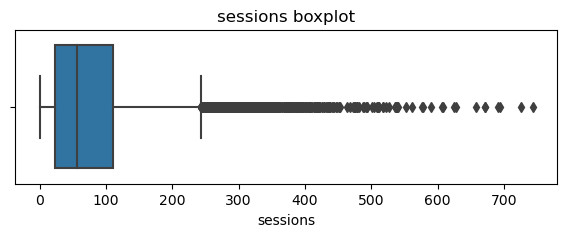

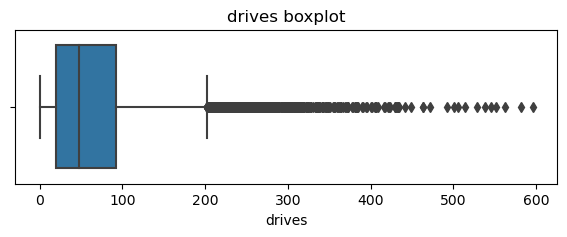

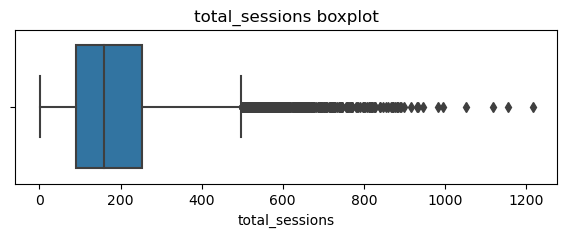

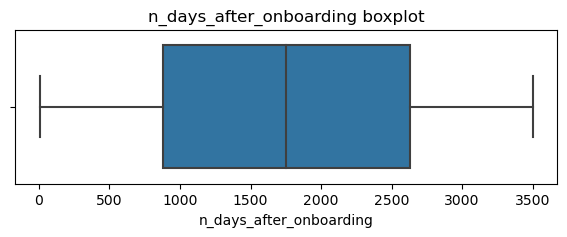

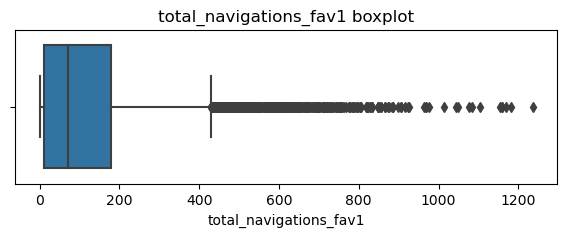

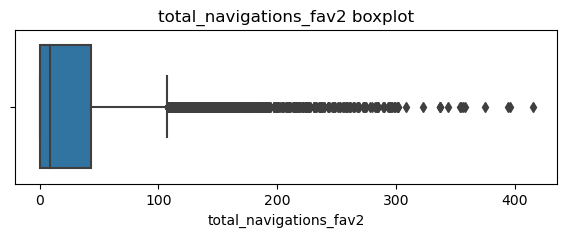

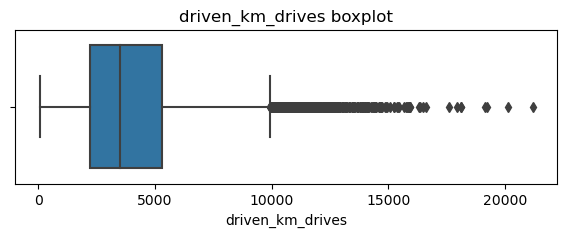

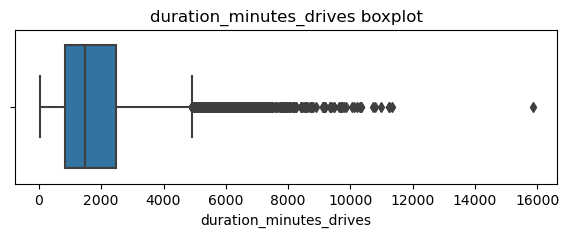

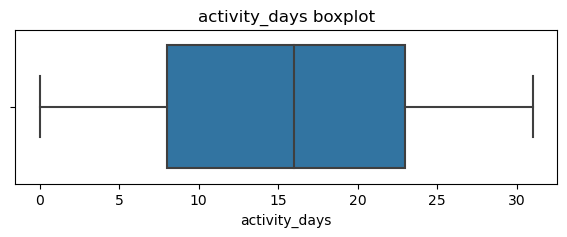

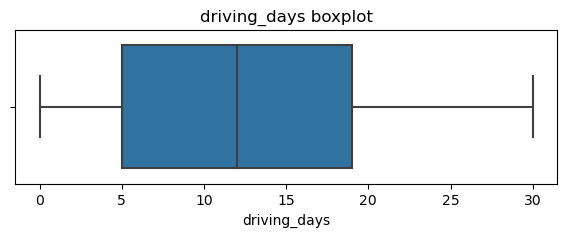

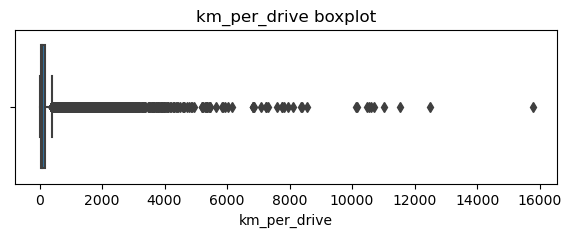

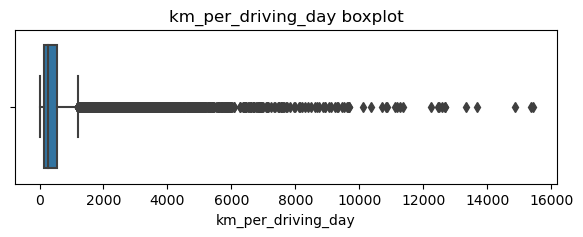

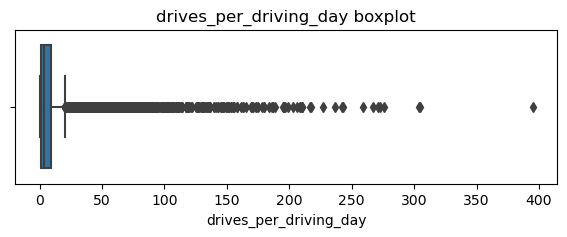

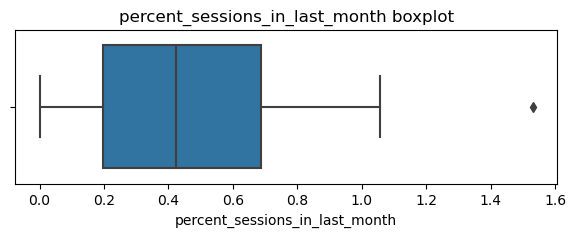

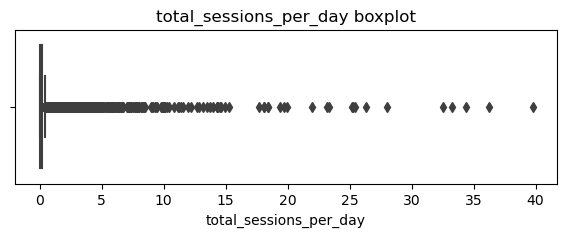

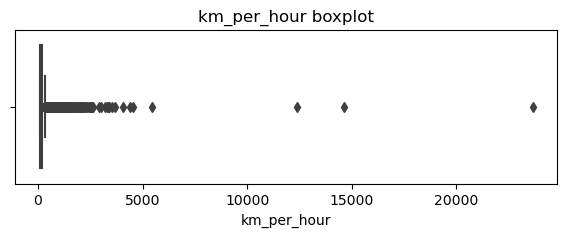

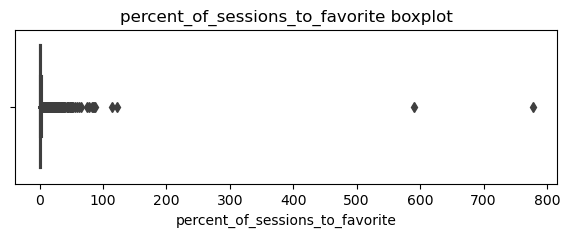

In [29]:
# Plot histograms for numerical features
for feature in numerical_features:    
    plt.figure(figsize=(7,2))
    ax = sns.boxplot(x = df[feature])
    plt.title(f'{feature} boxplot')
    plt.show()

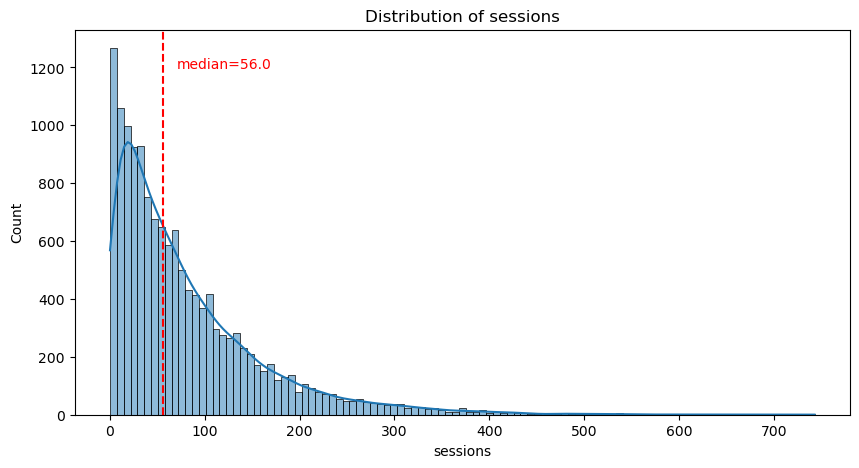

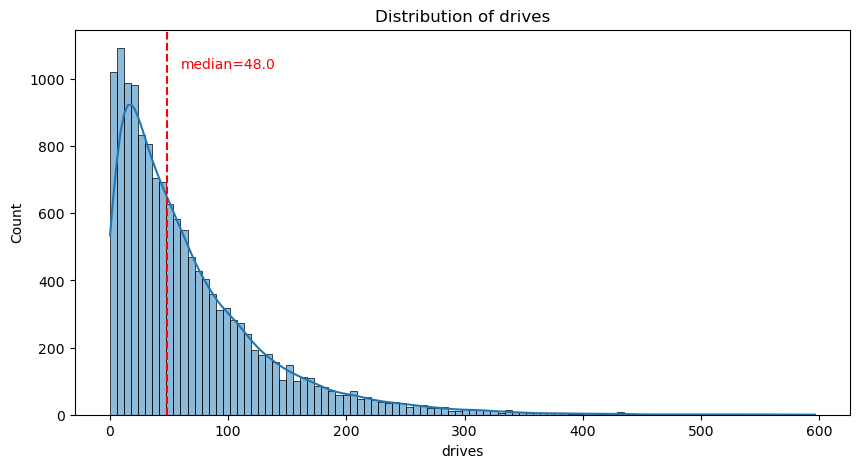

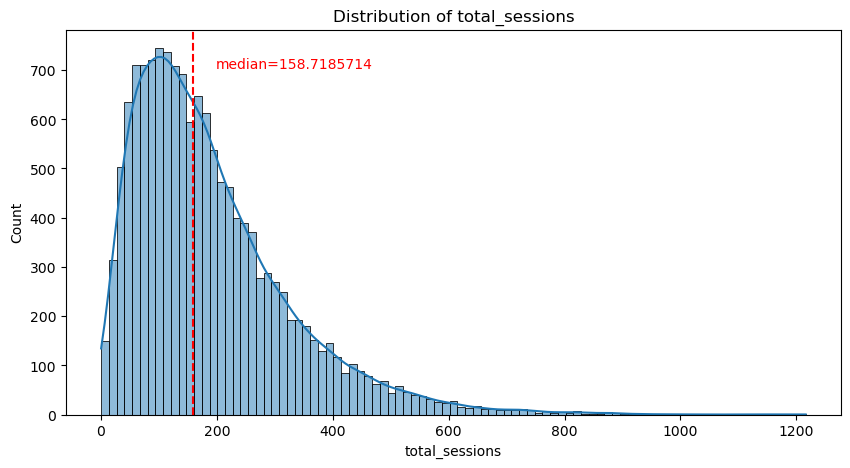

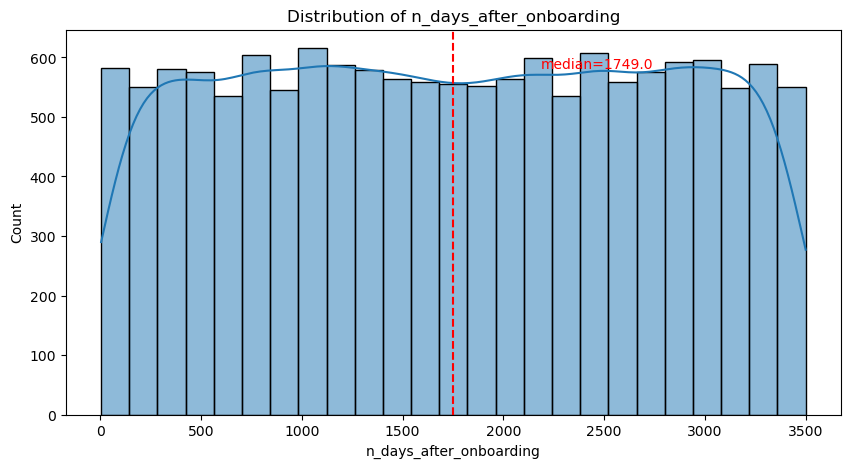

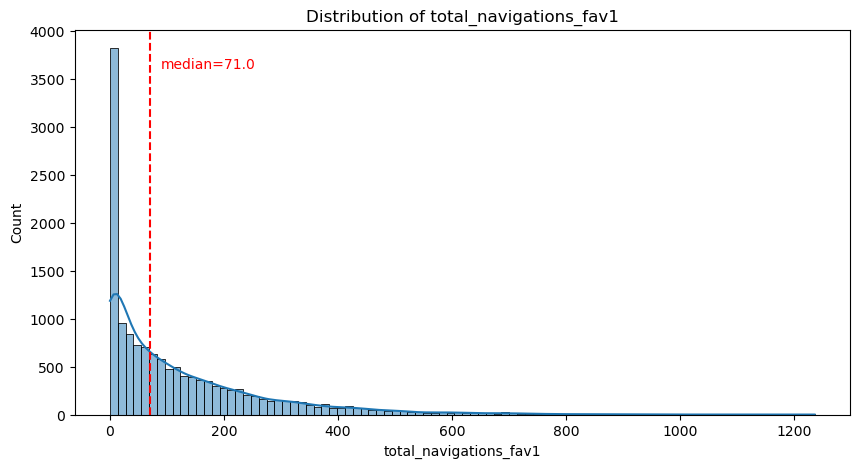

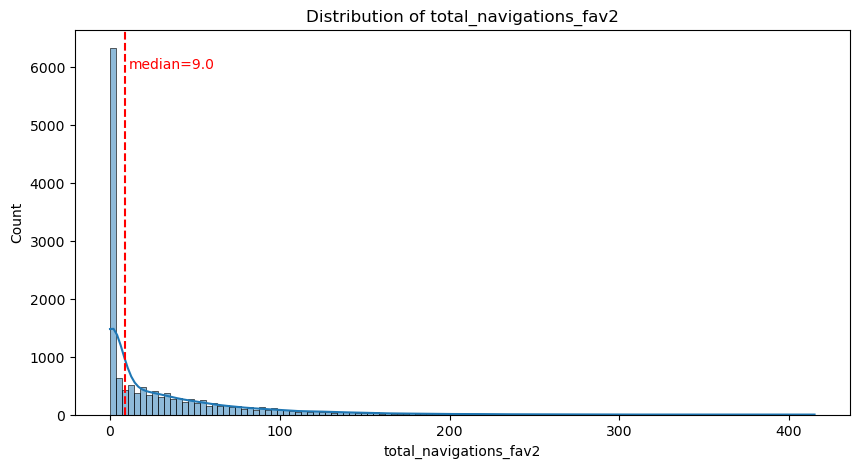

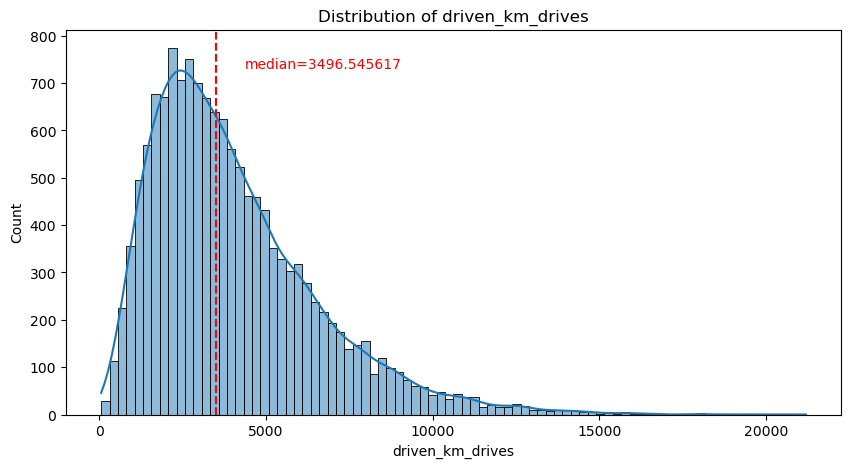

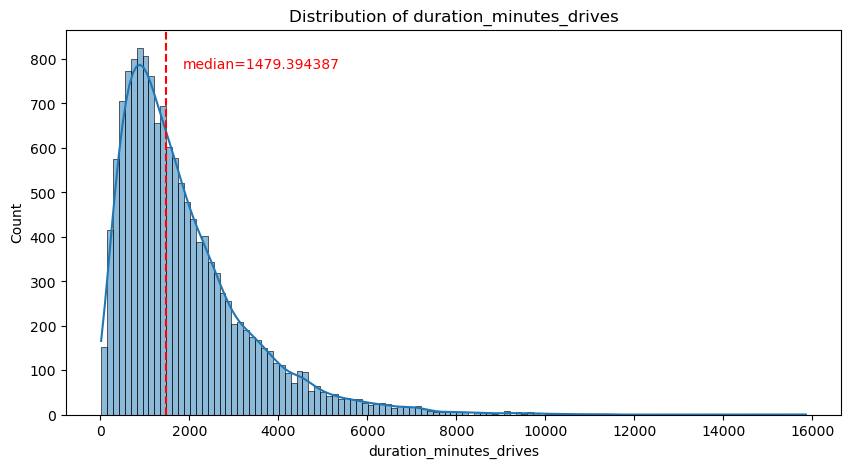

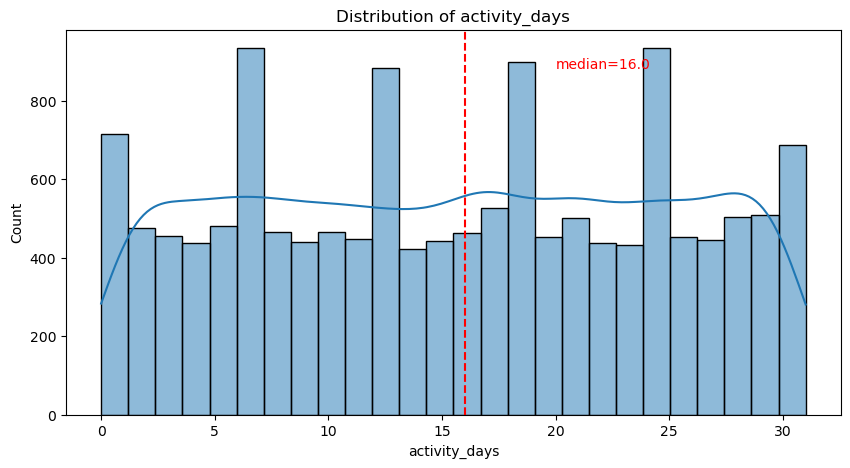

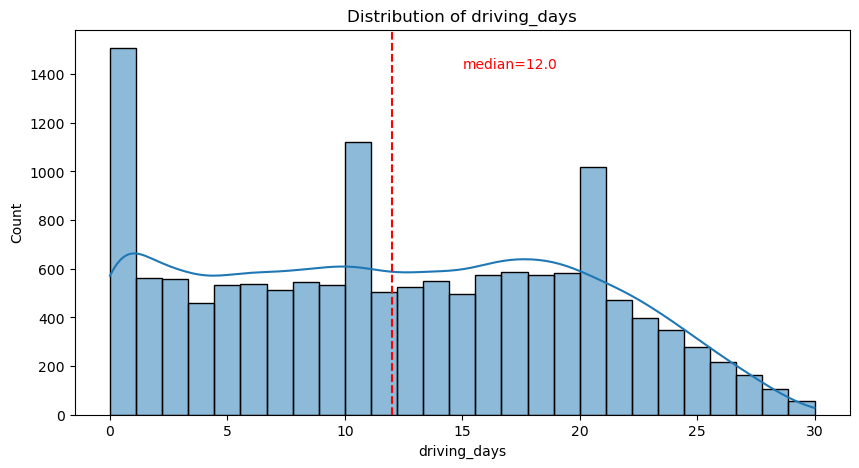

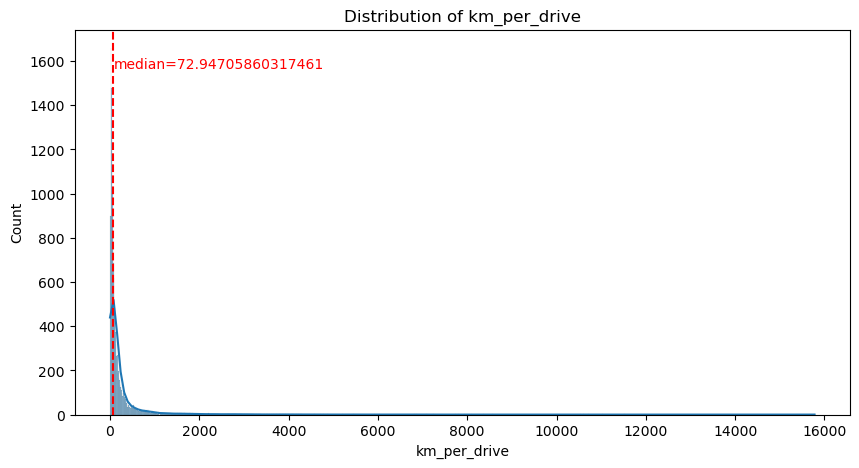

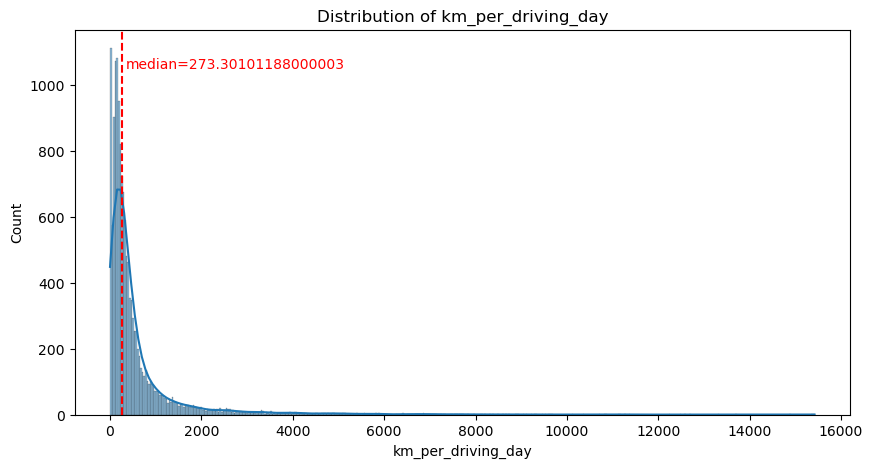

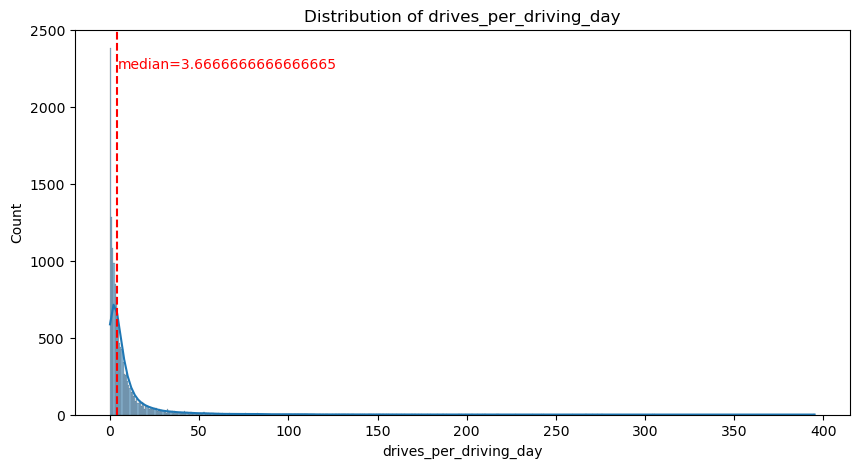

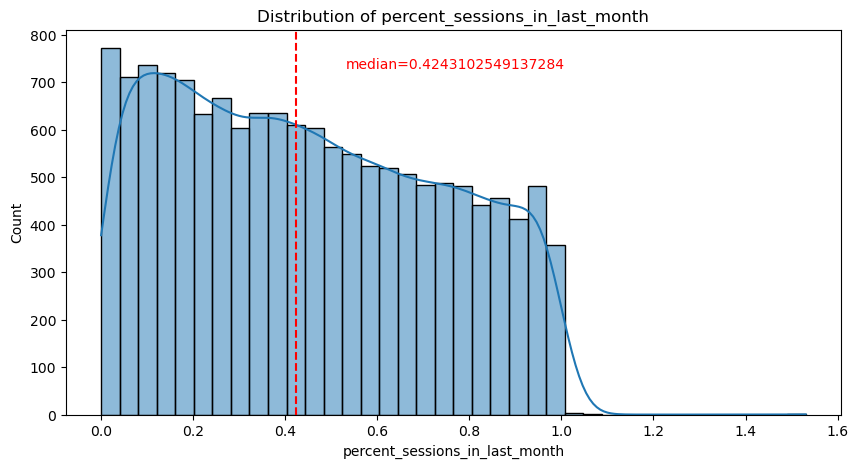

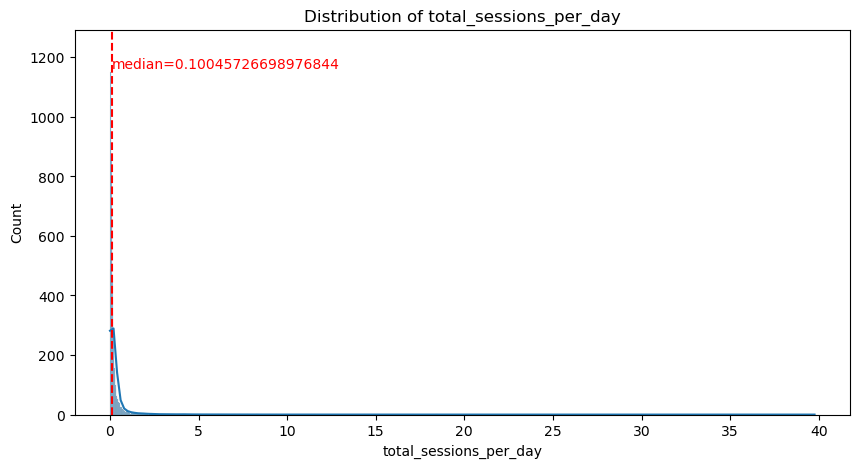

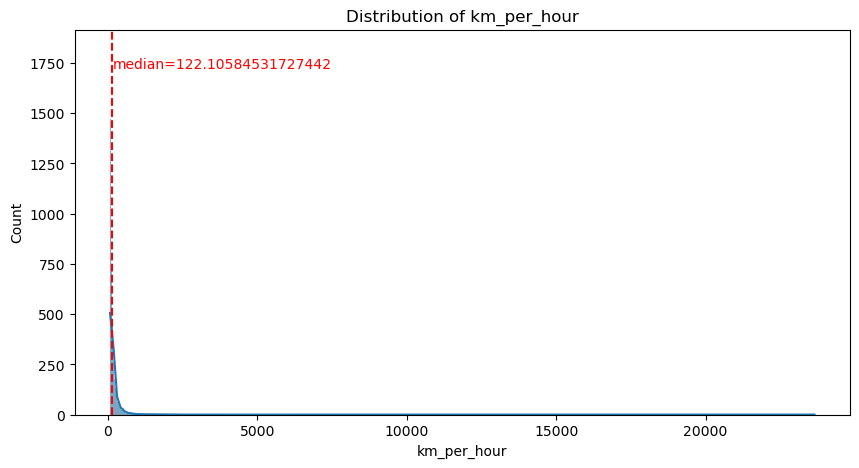

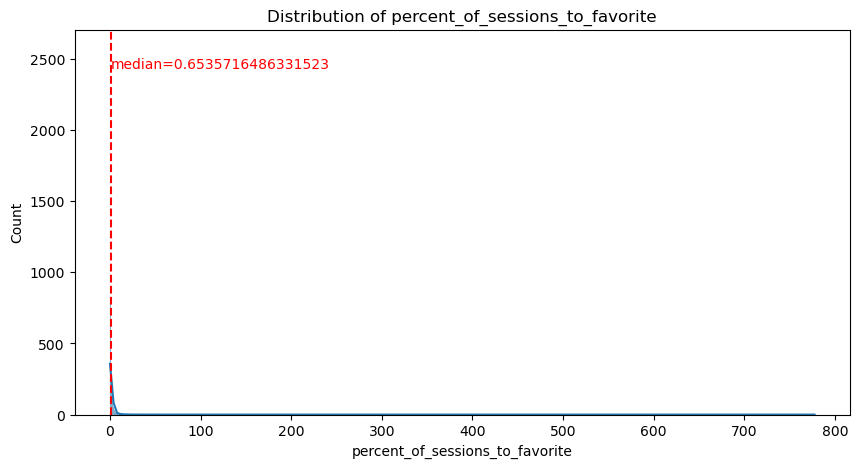

In [30]:
# Plot histograms for numerical features
for feature in numerical_features:    
    plt.figure(figsize=(10, 5))
    ax = sns.histplot(df[feature], kde=True)
    median = df[feature].median()
    ax.axvline(median, color = 'red', linestyle = '--')
    y_min, y_max = ax.get_ylim()
    y_pos = y_max * 0.9 
    x_pos = median + (median*0.25)
    ax.text(x_pos ,y_pos, 'median={}'.format(median), color='red')
    plt.title(f'Distribution of {feature}')
    plt.show()
    
    

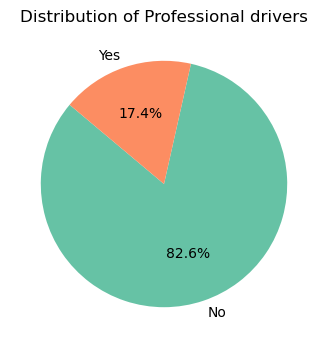

In [31]:
professional_drivers = df['professional_driver'].map({1: 'Yes', 0: 'No'})
plt.figure(figsize=(8, 4))           
plt.pie(df['professional_driver'].value_counts(), labels=professional_drivers.value_counts().index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62'])    
plt.title(f'Distribution of Professional drivers')
plt.show()

In [32]:
# Get count of null values by device
df['device'].value_counts()

iPhone     9225
Android    5074
Name: device, dtype: int64

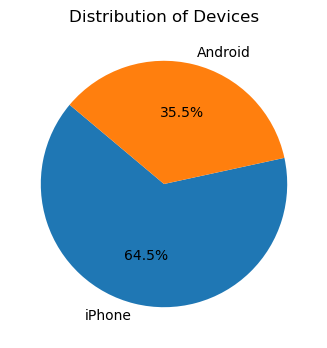

In [33]:
feature = 'device'
plt.figure(figsize=(8, 4))           
plt.pie(df[feature].value_counts(), labels=df[feature].value_counts().index, autopct='%1.1f%%', startangle=140)    
plt.title(f'Distribution of Devices')
plt.show()

In [34]:
# Calculate counts of churned vs. retained
print(df['label'].value_counts())

retained    11763
churned      2536
Name: label, dtype: int64


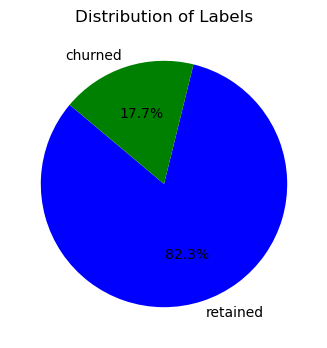

In [35]:
feature = 'label'
plt.figure(figsize=(8, 4))           
plt.pie(df[feature].value_counts(), labels=df[feature].value_counts().index, autopct='%1.1f%%', startangle=140,colors=['blue', 'green'])    
plt.title(f'Distribution of Labels')
plt.show()

In [36]:
# Calculate median values of all columns for churned and retained users
df.groupby('label').median(numeric_only=True)

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_drive,km_per_driving_day,drives_per_driving_day,percent_sessions_in_last_month,professional_driver,total_sessions_per_day,km_per_hour,percent_of_sessions_to_favorite,device2,label2
label,,,,,,,,,,,,,,,,,,,,
churned,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0,72.771939,407.597934,5.483333,0.438475,0.0,0.130587,119.608930,0.723486,1.0,1.0
retained,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0,73.006576,256.056187,3.470588,0.421848,0.0,0.095494,122.953052,0.636292,1.0,0.0


## Bivariate Analysis 

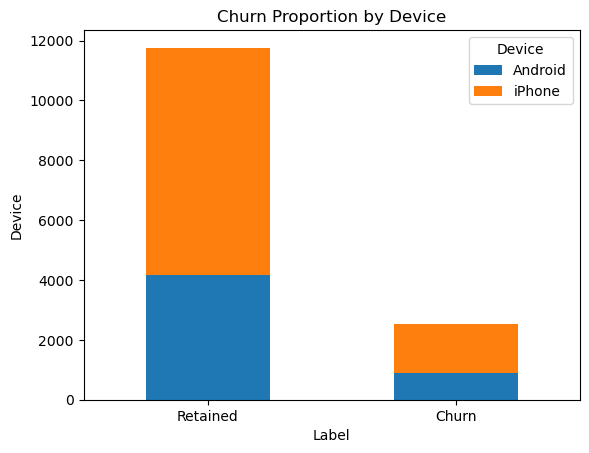

In [37]:
category_paid_counts = pd.crosstab(df['label2'], df['device2'])
category_paid_counts.plot(kind='bar', stacked=True)
plt.title('Churn Proportion by Device')
plt.legend(title='Device', labels=['Android', 'iPhone'])
plt.xticks(ticks=[0, 1], labels=['Retained', 'Churn'], rotation=0)
plt.xlabel('Label')
plt.ylabel('Device')
plt.show()

In [38]:
# For each label, calculate the number of Android users and iPhone users
df.groupby(['label', 'device']).size()

label     device 
churned   Android     891
          iPhone     1645
retained  Android    4183
          iPhone     7580
dtype: int64

In [39]:
# For each label, calculate the percentage of Android users and iPhone users
df.groupby('label')['device'].value_counts(normalize=True)

label     device 
churned   iPhone     0.648659
          Android    0.351341
retained  iPhone     0.644393
          Android    0.355607
Name: device, dtype: float64

#### **Retention by device**

Plot a histogram that has four bars&mdash;one for each device-label combination&mdash;to show how many iPhone users were retained/churned and how many Android users were retained/churned.

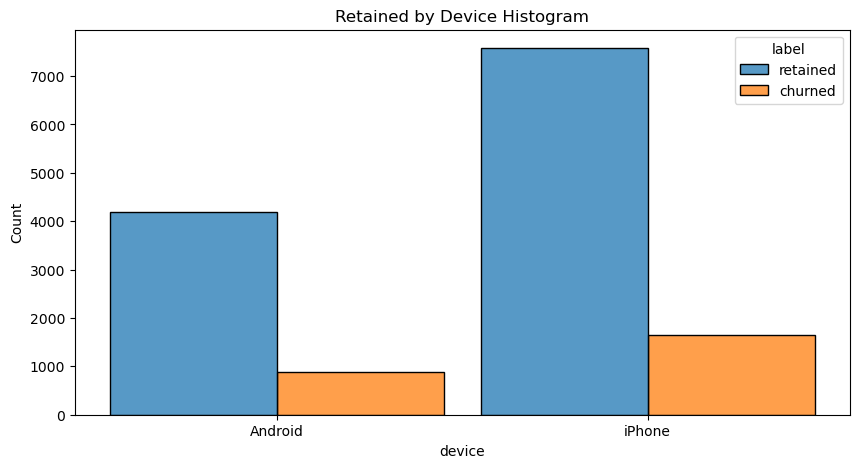

In [40]:
# Histogram
plt.figure(figsize=(10,5))
ax = sns.histplot(x=df['device'], hue=df['label'], multiple='dodge', shrink=0.9)
plt.title('Retained by Device Histogram')
plt.show()

The proportion of churned users to retained users is consistent between device types.

In [41]:
df['km_per_driving_day'].describe()

count    14299.000000
mean       581.942399
std       1038.254509
min          0.000000
25%        136.168003
50%        273.301012
75%        558.018761
max      15420.234110
Name: km_per_driving_day, dtype: float64

The maximum value is 15,420 kilometers _per drive day_. This is physically impossible. Driving 100 km/hour for 12 hours is 1,200 km. It's unlikely many people averaged more than this each day they drove, so, for now, disregard rows where the distance in this column is greater than 1,200 km.

Next we plot a histogram of the new `km_per_driving_day` column, disregarding those users with values greater than 1,200 km. Each bar should be the same length and have two colors, one color representing the percent of the users in that bar that churned and the other representing the percent that were retained. This can be done by setting the `multiple` parameter of seaborn's [`histplot()`](https://seaborn.pydata.org/generated/seaborn.histplot.html) function to `fill`.

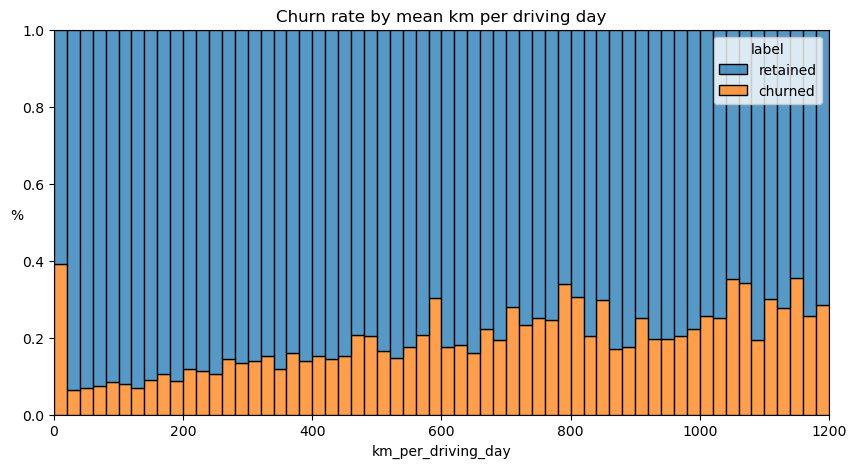

In [42]:
# Histogram
plt.figure(figsize=(10,5))
sns.histplot(data=df, 
             x = 'km_per_driving_day',
             hue = 'label',
             bins = range(0,1201,20),
             multiple='fill')
plt.ylabel('%', rotation = 0)
plt.title('Churn rate by mean km per driving day')
plt.show()

The churn rate tends to increase as the mean daily distance driven increases, confirming what was found in the previous course. It would be worth investigating further the reasons for long-distance users to discontinue using the app.

#### **Churn rate per number of driving days**

Create another histogram just like the previous one, only this time it should represent the churn rate for each number of driving days.

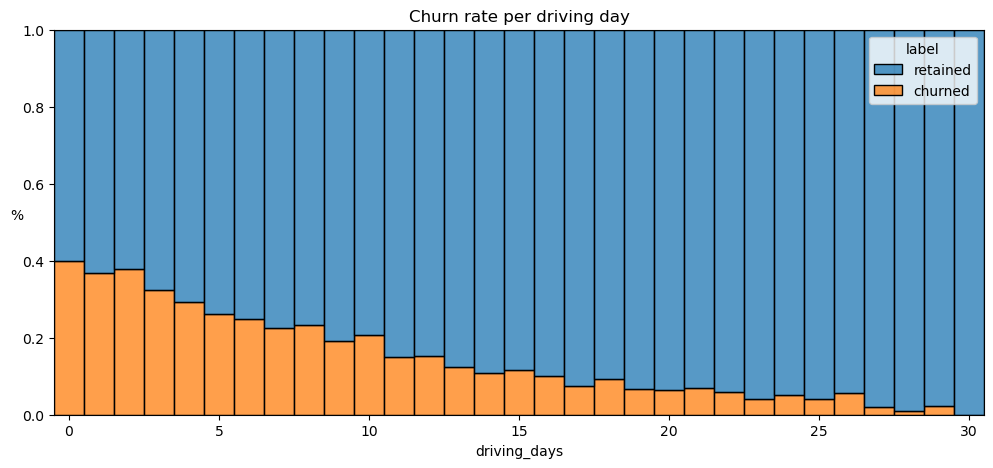

In [43]:
# Histogram
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='driving_days',
             bins=range(1,32),
             hue='label',
             multiple='fill',
             discrete=True)
plt.ylabel('%', rotation=0)
plt.title('Churn rate per driving day');

The churn rate is highest for people who didn't use Waze much during the last month. The more times they used the app, the less likely they were to churn. While 40% of the users who didn't use the app at all last month churned, nobody who used the app 30 days churned.

This isn't surprising. If people who used the app a lot churned, it would likely indicate dissatisfaction. When people who don't use the app churn, it might be the result of dissatisfaction in the past, or it might be indicative of a lesser need for a navigational app. Maybe they moved to a city with good public transportation and don't need to drive anymore.

#### **`driving_days` vs. `activity_days`**

Because both `driving_days` and `activity_days` represent counts of days over a month and they're also closely related, you can plot them together on a single histogram. This will help to better understand how they relate to each other without having to scroll back and forth comparing histograms in two different places.

Plot a histogram that, for each day, has a bar representing the counts of `driving_days` and `activity_days`.

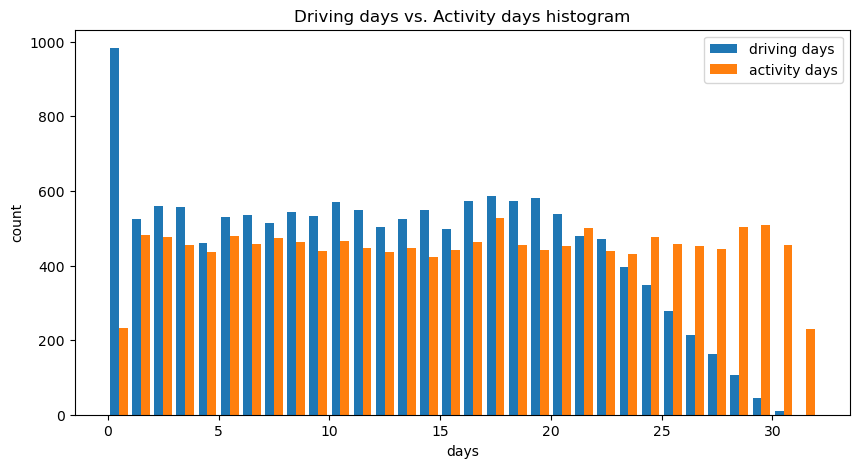

In [44]:
# Histogram
plt.figure(figsize=(10,5))
label=['driving days', 'activity days']
plt.hist([df['driving_days'], df['activity_days']], bins=range(0,33), label = label)
plt.title('Driving days vs. Activity days histogram')
plt.xlabel('days')
plt.ylabel('count')
plt.legend()
plt.show()

As observed previously, this might seem counterintuitive. After all, why are there _fewer_ people who didn't use the app at all during the month and _more_ people who didn't drive at all during the month?

On the other hand, it could just be illustrative of the fact that, while these variables are related to each other, they're not the same. People probably just open the app more than they use the app to drive&mdash;perhaps to check drive times or route information, to update settings, or even just by mistake.

Nonetheless, it might be worthwile to contact the data team at Waze to get more information about this, especially because it seems that the number of days in the month is not the same between variables.

Confirm the maximum number of days for each variable&mdash;`driving_days` and `activity_days`.

In [45]:
print('driving days =',df['driving_days'].max())
print('activity days =',df['activity_days'].max())

driving days = 30
activity days = 31


It is true. Although it is possible that not a single user drove all 31 days of the month, it is highly unlikely, considering there are 15,000 people represented in the dataset.

One other way to check the validity of these variables is to plot a simple scatter plot with the x-axis representing one variable and the y-axis representing the other.

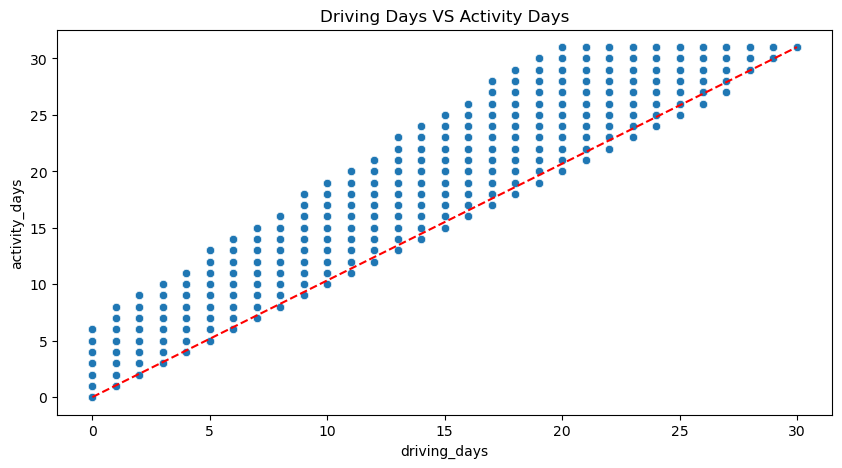

In [46]:
# Scatter plot
plt.figure(figsize=(10,5))
sns.scatterplot(x = df['driving_days'], y = df['activity_days'])
plt.title('Driving Days VS Activity Days')
plt.plot([0,30],[0,31], color='red', linestyle = '--')
plt.show()

Notice that there is a theoretical limit. If you use the app to drive, then by definition it must count as a day-use as well. In other words, you cannot have more drive-days than activity-days. None of the samples in this data violate this rule, which is good.

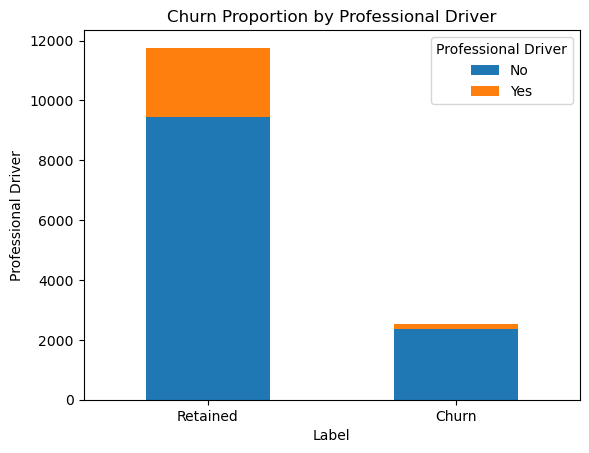

In [47]:
category_paid_counts = pd.crosstab(df['label2'], df['professional_driver'])
category_paid_counts.plot(kind='bar', stacked=True)
plt.title('Churn Proportion by Professional Driver')
plt.legend(title='Professional Driver', labels=['No', 'Yes'])
plt.xticks(ticks=[0, 1], labels=['Retained', 'Churn'], rotation=0)
plt.xlabel('Label')
plt.ylabel('Professional Driver')
plt.show()

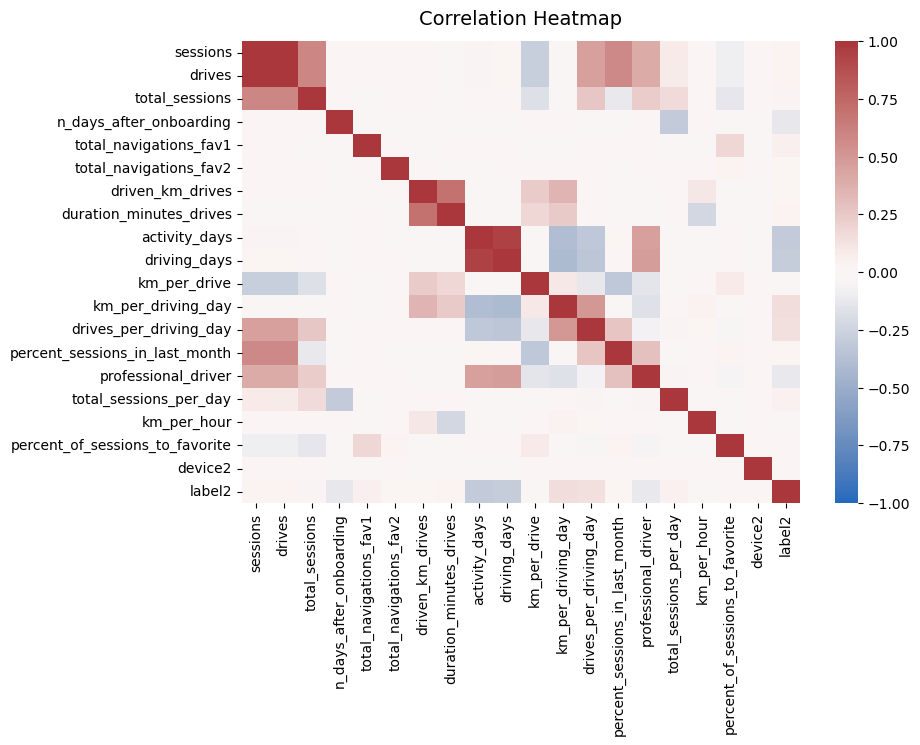

In [48]:
plt.figure(figsize=(9, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=False, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

plt.show();

### Handling outliers

The box plots from the previous section indicated that many of these variables have outliers. These outliers do not seem to be data entry errors; they are present because of the right-skewed distributions.

Depending on what you'll be doing with this data, it may be useful to impute outlying data with more reasonable values. One way of performing this imputation is to set a threshold based on a percentile of the distribution.

To practice this technique, write a function that calculates the 95th percentile of a given column, then imputes values > the 95th percentile with the value at the 95th percentile.  such as the 95th percentile of the distribution.


In [49]:
def outlier_imputer(column_name, percentile):
    # Calculate threshold
    threshold = df[column_name].quantile(percentile)
    # Impute threshold for values > than threshold
    df.loc[df[column_name] > threshold, column_name] = threshold

    print('{:>25} | percentile: {} | threshold: {}'.format(column_name, percentile, threshold))

Next, apply that function to the following columns:
* `sessions`
* `drives`
* `total_sessions`
* `driven_km_drives`
* `duration_minutes_drives`
* `total_navigations_fav1`
* `total_navigations_fav2`
* `km_per_drive`
* `km_per_driving_day`
* `drives_per_driving_day`
* `total_sessions_per_day`
* `km_per_hour`
* `percent_of_sessions_to_favorite`

In [50]:
for column in ['sessions', 'drives', 'total_sessions',
               'driven_km_drives', 'duration_minutes_drives',
              'total_navigations_fav1','total_navigations_fav2','km_per_drive',
               'km_per_driving_day','drives_per_driving_day','total_sessions_per_day',
               'km_per_hour','percent_of_sessions_to_favorite'
              ]:
               outlier_imputer(column, 0.95)

                 sessions | percentile: 0.95 | threshold: 243.0
                   drives | percentile: 0.95 | threshold: 200.0
           total_sessions | percentile: 0.95 | threshold: 455.4394923899998
         driven_km_drives | percentile: 0.95 | threshold: 8898.716274999999
  duration_minutes_drives | percentile: 0.95 | threshold: 4668.180091799999
   total_navigations_fav1 | percentile: 0.95 | threshold: 422.0
   total_navigations_fav2 | percentile: 0.95 | threshold: 124.0
             km_per_drive | percentile: 0.95 | threshold: 913.8787793271415
       km_per_driving_day | percentile: 0.95 | threshold: 2258.494484349992
   drives_per_driving_day | percentile: 0.95 | threshold: 36.75
   total_sessions_per_day | percentile: 0.95 | threshold: 1.089743210665185
              km_per_hour | percentile: 0.95 | threshold: 488.8242241100432
percent_of_sessions_to_favorite | percentile: 0.95 | threshold: 5.502384484946717


In [51]:
df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_drive,km_per_driving_day,drives_per_driving_day,percent_sessions_in_last_month,professional_driver,total_sessions_per_day,km_per_hour,percent_of_sessions_to_favorite,device2,label2
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,76.539688,63.964683,183.717304,1751.822505,114.562767,27.187216,3944.558631,1792.911210,15.544653,12.182530,168.147169,484.488544,7.369359,0.449837,0.173998,0.203300,165.698737,1.230349,0.645150,0.177355
std,67.243178,55.127927,118.720520,1008.663834,124.378550,36.715302,2218.358258,1224.329759,9.016088,7.833835,232.903899,570.872328,9.519874,0.286863,0.379121,0.267737,110.185653,1.474618,0.478485,0.381982
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000298,72.013095,0.000000,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000,32.486524,136.168003,1.230769,0.196890,0.000000,0.050818,90.649402,0.206064,0.000000,0.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000,72.947059,273.301012,3.666667,0.424310,0.000000,0.100457,122.105845,0.653572,1.000000,0.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000,179.347527,558.018761,9.000000,0.687251,0.000000,0.215210,193.238449,1.643183,1.000000,0.000000
max,243.000000,200.000000,455.439492,3500.000000,422.000000,124.000000,8898.716275,4668.180092,31.000000,30.000000,913.878779,2258.494484,36.750000,1.530637,1.000000,1.089743,488.824224,5.502384,1.000000,1.000000


### **Conclusion**

Analysis revealed that the overall churn rate is \~17%, and that this rate is consistent between iPhone users and Android users.

Perhaps you feel that the more deeply you explore the data, the more questions arise. This is not uncommon! In this case, it's worth asking the Waze data team why so many users used the app so much in just the last month.

Also, EDA has revealed that users who drive very long distances on their driving days are _more_ likely to churn, but users who drive more often are _less_ likely to churn. The reason for this discrepancy is an opportunity for further investigation, and it would be something else to ask the Waze data team about.

In [52]:
df.to_csv('data/pre_process_waze.csv',sep=',', encoding='utf-8',index=False) 

### **Conclusion**

Now that you've explored and visualized your data, the next step is to share your findings with Harriet Hadzic, Waze's Director of Data Analysis. Consider the following questions as you prepare to write your executive summary. Think about key points you may want to share with the team, and what information is most relevant to the user churn project.

**Questions:**

1. What types of distributions did you notice in the variables? What did this tell you about the data?

> *Nearly all the variables were either very right-skewed or uniformly distributed. For the right-skewed distributions, this means that most users had values in the lower end of the range for that variable. For the uniform distributions, this means that users were generally equally likely to have values anywhere within the range for that variable.*

2. Was there anything that led you to believe the data was erroneous or problematic in any way?

> *Most of the data was not problematic, and there was no indication that any single variable was completely wrong. However, several variables had highly improbable or perhaps even impossible outlying values, such as `driven_km_drives`. Some of the monthly variables also might be problematic, such as `activity_days` and `driving_days`, because one has a max value of 31 while the other has a max value of 30, indicating that data collection might not have occurred in the same month for both of these variables.*

3. Did your investigation give rise to further questions that you would like to explore or ask the Waze team about?

> *Yes. I'd want to ask the Waze data team to confirm that the monthly variables were collected during the same month, given the fact that some have max values of 30 days while others have 31 days. I'd also want to learn why so many long-time users suddenly started using the app so much in just the last month. Was there anything that changed in the last month that might prompt this kind of behavior?*

4. What percentage of users churned and what percentage were retained?

> *Less than 18% of users churned, and \~82% were retained.*

5. What factors correlated with user churn? How?

> *Distance driven per driving day had a positive correlation with user churn. The farther a user drove on each driving day, the more likely they were to churn. On the other hand, number of driving days had a negative correlation with churn. Users who drove more days of the last month were less likely to churn.*

6. Did newer uses have greater representation in this dataset than users with longer tenure? How do you know?

> *No. Users of all tenures from brand new to \~10 years were relatively evenly represented in the data. This is borne out by the histogram for `n_days_after_onboarding`, which reveals a uniform distribution for this variable.*